# Wine Quality Project

Begin this project in Week 2 and turn it in for feedback in Discussions by Sunday (11:59 PM) in Week 3. Respond to two of your colleagues by Thursday (11:59 PM) of Week 4 and finally turn in your project on Sunday (11:59 PM) of week 4.

If you are working in Google Colab, you will need to upload your data files, using the file icon on the left. If you are working in Jupyter Lab, be sure your data files are in the folder that you are using.

Note that in this Jupyter notebook, I have included some figures. If you click on the figure, it will look like a long list of characters. Just go back out of editing mode to see the picture.



In [50]:
# These are the Basic imports used in the Ch01 notebook that came with the text Essential Math
# change to whatever you need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])




#### Dataset

Gradient descent on a dataset on red wine quality,
where various chemical properties of wines are described (the dataset
comes from here: https://archive.ics.uci.edu/ml/datasets/wine+quality.
The related paper is Cortez, Paulo, et al. “Modeling wine preferences by
data mining from physicochemical properties.” Decision Support Systems
47.4 (2009): 547-553.) .

Let’s have a look at the first rows and columns:

In [51]:
# the data set is now the csv file.
data = pd.read_csv("winequality-red.csv", sep=";")
data.iloc[:6, :12]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


The goal is to implement linear regression to model the relationship
between two features of this dataset: the *fixed acidity* of the wine and
its *density*. Notice that these are two of the headings. You wouldn't see that unless you list the headings out to the 9th one.

In [52]:
#run this code.
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Let’s first look at the scatter plot of these variables:




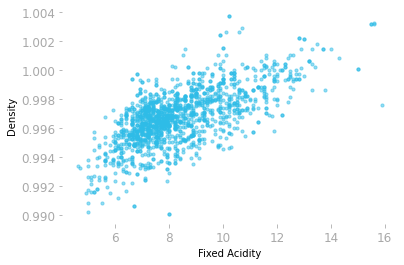

In [53]:

plt.scatter(data['fixed acidity'], data['density'], s=10, alpha=0.5)
# [...] Add axes, labels etc.

plt.xlabel("Fixed Acidity")
plt.ylabel("Density")
plt.show()



Figure 4: Density of wines as a function of fixed acidity. Each point corresponds to a data observation.

Let’s create the variables `X` and `Y` from the Pandas dataframe. This doesn't transform the values of the data in any way.

In [54]:
X = data['fixed acidity'].to_numpy().reshape(-1, 1)
X.shape

(1599, 1)

In [55]:
Y = data['density'].to_numpy().reshape(-1, 1)
Y.shape

(1599, 1)

You need to reshape the Numpy arrays to use them in the following
Sklearn method.

You’ll also standardize the data: transform the variables to have a
mean equal to zero and a standard deviation equal to one:

In [56]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
Y = standard_scaler.fit_transform(Y)

#### Derivative of the Cost Function

You can use your `MSE_derivative` function to calculate the derivative
using these data. Let’s try it with $\theta=0$:

In [57]:
#The definition of MSE-derivative 
def MSE_derivative(x, y, theta):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    print("n",n)
    derivative = (1/n) * np.sum((theta * x - y) * x)
    return derivative


MSE_derivative(x=X, y=Y, theta=0)

n 1599


-0.6680472921189744

This negative value tells you that you need to increase $\theta$ if you
want to reduce the cost.

#### Parameter Update

A large derivative value means that the slope is steep. In this case,
you want to add or subtract a large value to approach the minimum
rapidly. This is why you update the parameters by subtracting the value
of the derivative to the parameter: a large value will largely change
the parameter and a small value not so much.

In addition, a weight, called the *learning rate*, is applied to the
derivative allowing you to choose how large are the steps done at each
iteration. This is done by multiplying a scalar to the derivative
(called `lr` for ‘learning rate’ in the following code):

In [58]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
theta

n 1599


0.006680472921189744

This is the value of $\theta$ after the update. Let’s iteratively update
the parameters, store the cost and the parameter value and plot the cost
as a function of the parameters:

n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599
n 1599


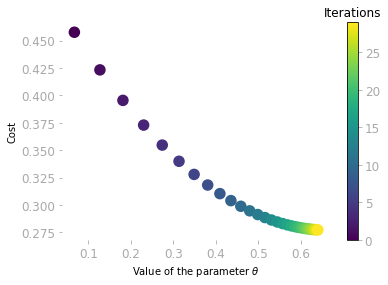

In [59]:
# Question 4 - insert comments here
# this is setting the starting value of theta the parameter we're optimizing to 0.
# set the learning rate for controls of the size of each step to 0.1.
lr = 0.1
theta = 0

# Setting and creating the empty list to store values of theta 
theta_all = []  
cost_all = []   

# Loop for 30 iterations 
# In each iteration it'll adjust theta to minimize the cost and calculate the cost (MSE) based on the updated theta
for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
    cost = MSE(X, Y, theta)
    # Save the updated theta and cost to track how they change over iterations.
    theta_all.append(theta)
    cost_all.append(cost)

# Plotting the final calculations on a scatter plot with theta and cost
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

#labels for the plot
plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")

# Adding a color bar 
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()


Figure 5: Cost as a function of the parameter $\theta$. The cost decreases at each iteration. We are trying to find the value of theta at the turning point of the curve - where the derivative is zero.

You can see in Figure [5] that the
cost decreases at each iteration. But a lot depended on the initial choice of theta. Try other values of theta to see what happens (no need to show this work).


Let’s see what is the best parameter
value that you got and use it to plot the corresponding regression line:

In [60]:
# Question 4 - insert comments here
# Now we're retrieveing the final value of theta slope after all iterations.
best_slope = theta_all[-1]
print("best slope",best_slope)
#cost_all corresponds to the lowest cost achieved during the optimization.
lowest_cost = cost_all[-1]
print("lowest cost",lowest_cost)

best slope 0.6397279936234294
lowest cost 0.27725739907989283


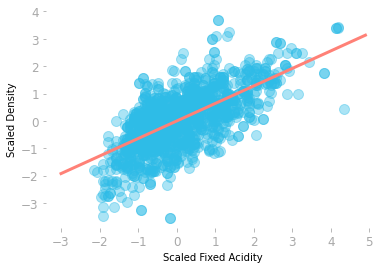

In [61]:
# Question 4 - insert comments here
# The range of values is from -3 to 5, with a step size of 0.1, creating a smooth range from a clear graph.
x_axis = np.arange(-3, 5, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X, Y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

plt.xlabel("Scaled Fixed Acidity")
plt.ylabel("Scaled Density")
plt.show()




You can see in Figure [6] that after
30 iterations you reach a slope that fits the data well.





### The difference between correlation and regression

Correlation and linear regression are not the same.


### Question for you

Next, I'll compute the correlation of the fixed acidity and density. What relationship does that have with the regression line?

Draw a conclusion about the fixed acidity and density of red wine from your regression line. Explain it in terms of what information this line provides. How can it be used? What does it mean specifically for this example?

Correlation coefficient is 0.6680472921189711


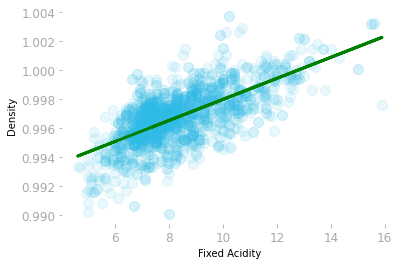

In [62]:
# Calculate correlation using pandas
correlation = data[['fixed acidity', 'density']].corr().iloc[0, 1]
print("Correlation coefficient is", correlation)

plt.scatter(data['fixed acidity'], data['density'], alpha=0.1)
plt.xlabel("Fixed Acidity")
plt.ylabel("Density")

fixed_acidity = data['fixed acidity']
density = data['density']

slope, intercept = np.polyfit(fixed_acidity, density, 1)
regression = slope * fixed_acidity + intercept

plt.plot(fixed_acidity, regression, color='green', label='Regression Line')

### I've got the correlation coefficient of 0.668 which shows a positive link between fixed acidity and density in red wine, meaning that as acidity increases, so does density. Furthermore, the regression line helps predict density based on acidity using its slope. Also, this relationship could be useful for winemakers because it shows how acidity affects the wine's density, which can influence its texture and quality. While the trend is clear, other factors also play a role, so it’s not a perfect relationship. This could just be a starting point to help winemakers better control and improve their wine-making process.

2 other meaningful variables from the red wine data and perform the above steps for these 2 new variables.

Let's look at the scatter plot of these variables. I'll use Gradient Descent to find the best slope of the regression line and plot it on top of the scatter plot. Also compute the Correlation of the two variables.

Next, I'll draw a conclusion from my regression line. Compare and contrast to the correlation. The correlation will be positive if the line has positive slope and negative if the line has negative slope, but otherwise, they are unrelated. 



Best slope: 0.05352606518321242
Lowest cost: 0.49042582077294594


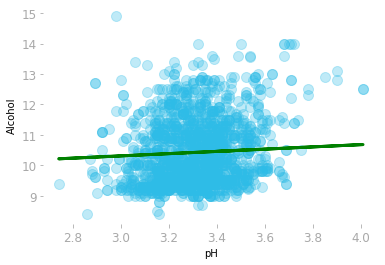

Correlation coefficient: 0.20563250850549894


In [65]:

# Assuming data is a pandas DataFrame with 'pH' and 'alcohol' columns
X = data['pH'].to_numpy().reshape(-1, 1)
Y = data['alcohol'].to_numpy().reshape(-1, 1)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Define MSE Derivative and cost
def MSE_derivative(x, y, theta):
    n = len(x)
    return (1 / n) * np.sum((theta * x - y) * x)

def MSE(x, y, theta):
    n = len(x)
    return (1 / (2 * n)) * np.sum((theta * x - y) ** 2)

# Gradient Descent Initialization
lr = 0.01
theta = 0
iterations = 30

theta_all = []
cost_all = []

# Gradient Descent
for i in range(iterations):
    theta = theta - lr * MSE_derivative(X_scaled, Y_scaled, theta)
    cost = MSE(X_scaled, Y_scaled, theta)
    theta_all.append(theta)
    cost_all.append(cost)

# Outputs
best_slope = theta_all[-1]
lowest_cost = cost_all[-1]
print("Best slope:", best_slope)
print("Lowest cost:", lowest_cost)

# Scatter plot and regression line
plt.scatter(data['pH'], data['alcohol'], alpha=0.3, label='Data points')

# Using the best slope from gradient descent
regression_line = best_slope * X_scaled
plt.plot(X, scaler.inverse_transform(regression_line), color='green')

plt.xlabel("pH")
plt.ylabel("Alcohol")
plt.show()

# Correlation coefficient
correlation_coefficient = data[['pH', 'alcohol']].corr().iloc[0, 1]
print("Correlation coefficient:", correlation_coefficient)



 ### First the best slope of 0.0535 indicates a slight positive relationship between pH and alcohol in wine. This means that as the pH increases, the alcohol content tends to increase, but the effect is so small. The lowest cost of 0.4904 shows how well the regression line fits the data, with lower values indicating a better fit. Furthermore, the correlation coefficient of 0.2056 confirms a weak positive linear relationship between the two variables, meaning the connection between pH and alcohol is minimal. So these two variable suggest that pH is not a strong deciding factor of alcohol content in this dataset, but there is a slight trend worth noting.